<h1>Interview Status Prediction</h1>

<h2>Overview :</h2>

Hey, so we've got this massive dataset at our company, where we conduct over 100,000 interviews every year. It's all thanks to this fantastic tool we use called Interview-Intel. What's cool about it is that it records, transcribes, and analyzes everything that goes on during the interviews. We're talking conversations with job applicants, questions from the interviewers, and all that good stuff. It's a game-changer for our hiring process.

This dataset is like a goldmine for us. We've got details on each interview, who the candidates are, who's in the interview panel, what was said, and even whether the candidates passed or failed.

We're using all this data to predict interview outcomes and even check if there's any bias in our interviews. It's helping us hire the best talent while making sure the process is fair and square. It's pretty exciting stuff!"

In [2]:
import pandas as pd, numpy as np,seaborn as sns, matplotlib.pyplot as plt,warnings
warnings.filterwarnings("ignore")

<h2>About the Dataset</h2>

Description : You are a data scientist of a big MNC who usually hires more than 10k candidates every year.

To complete the task they conduct more than 1 lakhs interviews every year.
Interview-Intel is the modern way to approach hiring by harmonizing all aspects of the interview process into a beautiful symphony. An interview intelligence tool records,transcribes, and analyzes candidate conversations. It helps the hiring managers, recruiters, and HR Business Partners (HRBPs) to gain deeper visibility into the interview process, create smooth feedback loops between the panelists, and improve the overall recruitment process.

You need to predict the status of the interviews so that recruiters can check the sanity of the interview and find if the interview was biased.

<h2>Data Dictionary : </h2>

*   Interview Id
*   Candidate Id
*   Interviewer Id
*   Profile
*   S.L.R.C
*   S.L.R.I
*   A.T.T
*   L.M.I
*   L.M.C
*   S.R
*   L.J.T.C
*   L.J.T.I
*   N.I.C
*   N.I.I
*   S.P.I
*   S.P.C
*   L.A.C
*   Q.A
*   P.E.I
*   P.E.C
*   COMPLIANCE Ratio
*   Interview duration
*   Interview intro
*   Candidate into
*   Opp to ask
*   Status

In [4]:
# Traning Data Set With Target Variable
stud = pd.read_csv(r'/content/drive/MyDrive/Machine Learning/Hackathon Projects/Interview pred/Data Set/train_IA_-_train.csv',header = 0,index_col=0 )

In [5]:
# Test Data Set Without Target Variable
test = pd.read_csv(r"/content/drive/MyDrive/Machine Learning/Hackathon Projects/Interview pred/Data Set/test_IA_-_test (1).csv",header = 0,index_col=0 )

In [6]:
stud.head()

,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,...,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status
Interview Id,,,,,,,,,,,,,,,,,,,,,
6.913030e+11,2.655774e+09,194,Developer,0.98,0.02,53,88,93,32,88,...,15,6,Neutral,Neutral,98,37,No,Yes,Yes,Consider
9.214326e+11,7.123846e+08,234,Sales,0.67,0.33,51,53,44,36,93,...,15,4,Neutral,Negative,54,33,No,No,Yes,Consider
4.718839e+10,8.445533e+08,267,Program Manager,0.81,0.19,60,77,75,54,52,...,7,3,Positive,Positive,31,58,No,Yes,No,Consider
9.943741e+11,6.511106e+09,199,Marketing,0.69,0.31,93,42,103,49,115,...,10,7,Positive,Negative,24,35,No,Yes,No,Consider
3.509007e+11,3.487001e+09,221,QA Automation,0.57,0.43,44,44,119,66,190,...,7,3,Negative,Positive,73,60,Yes,Yes,No,Consider


<h2>Check Your Data</h2>

In [7]:
stud.columns

Index(['Candidate Id', 'Interviewer Id', 'Profile', 'S.L.R.C', 'S.L.R.I',
       'A.T.T', 'L.M.I', 'L.M.C', 'S.R', 'L.J.T.C', 'L.J.T.I', 'N.I.C',
       'N.I.I', 'S.P.I', 'S.P.C', 'L.A.C', 'L.A.I', 'Q.A', 'P.E.I', 'P.E.C',
       'COMPLIANCE Ratio', 'Interview duration', 'Interviewer Intro',
       'Candidate into', 'Opp to ask', 'Status'],
      dtype='object')

In [8]:
stud.shape

(5800, 26)

<h1>Exploratory Data Analysis</h1>

In [9]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5800 entries, 691302971928.0 to 863040675358.0
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Candidate Id        5800 non-null   float64
 1   Interviewer Id      5800 non-null   int64  
 2   Profile             5800 non-null   object 
 3   S.L.R.C             5800 non-null   float64
 4   S.L.R.I             5800 non-null   float64
 5   A.T.T               5800 non-null   int64  
 6   L.M.I               5800 non-null   int64  
 7   L.M.C               5800 non-null   int64  
 8   S.R                 5800 non-null   int64  
 9   L.J.T.C             5800 non-null   int64  
 10  L.J.T.I             5800 non-null   int64  
 11  N.I.C               5800 non-null   int64  
 12  N.I.I               5800 non-null   int64  
 13  S.P.I               5800 non-null   int64  
 14  S.P.C               5800 non-null   int64  
 15  L.A.C               5800 non-n

In [10]:
stud.describe()

,Candidate Id,Interviewer Id,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,COMPLIANCE Ratio,Interview duration
count,5.800000e+03,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000
mean,5.009458e+09,229.553448,0.748321,0.251679,69.927414,80.445172,80.084310,45.077414,150.231207,301.063103,37.709828,37.378448,55.175862,47.250690,8.019655,10.503621,4.507586,50.315517,37.306724
std,2.873886e+09,22.884836,0.144272,0.144272,29.464030,23.450059,23.540515,14.729066,87.265858,172.861851,19.042870,19.138247,20.373655,24.891818,4.311379,5.724640,1.690976,28.696299,13.298407
min,1.467066e+05,190.000000,0.500000,0.010000,20.000000,40.000000,40.000000,20.000000,0.000000,0.000000,5.000000,5.000000,20.000000,5.000000,1.000000,1.000000,2.000000,0.000000,15.000000
25%,2.513537e+09,210.000000,0.620000,0.130000,44.000000,60.000000,59.000000,32.000000,74.000000,153.000000,21.000000,21.000000,38.000000,26.000000,4.000000,6.000000,3.000000,25.000000,26.000000
50%,5.009811e+09,229.000000,0.750000,0.250000,70.000000,81.000000,81.000000,45.000000,150.000000,300.000000,38.000000,37.000000,55.000000,46.000000,8.000000,10.000000,5.000000,51.000000,37.000000
75%,7.468382e+09,250.000000,0.870000,0.380000,96.000000,101.000000,101.000000,58.000000,226.000000,451.000000,54.000000,54.000000,73.000000,69.000000,12.000000,15.000000,6.000000,75.000000,49.000000
max,9.999362e+09,268.000000,0.990000,0.500000,120.000000,120.000000,120.000000,70.000000,300.000000,600.000000,70.000000,70.000000,90.000000,90.000000,15.000000,20.000000,7.000000,100.000000,60.000000


In [11]:
stud.isnull().sum()
# So we can clearly see there are very less null values, that's we will use Central Tendency later On.

Candidate Id          0
Interviewer Id        0
Profile               0
S.L.R.C               0
S.L.R.I               0
A.T.T                 0
L.M.I                 0
L.M.C                 0
S.R                   0
L.J.T.C               0
L.J.T.I               0
N.I.C                 0
N.I.I                 0
S.P.I                 0
S.P.C                 0
L.A.C                 0
L.A.I                 0
Q.A                   0
P.E.I                 1
P.E.C                 3
COMPLIANCE Ratio      0
Interview duration    0
Interviewer Intro     1
Candidate into        0
Opp to ask            1
Status                4
dtype: int64

In [12]:
stud.duplicated().sum()
#there are No dupicates in the data

0

In [13]:
# stud.drop_duplicates(inplace=True)
# stud.shape

In [14]:
# for i in stud.columns:
#   print({i:stud[i].unique()})

<h2>Missing Data Imputation</h2>

* The dataset contains a small number of missing values, which can be addressed by imputing them with appropriate statistics.
For numerical features, we can replace the missing values with the mean,
* While for categorical features, we can impute them with the mode.
This approach helps ensure that the dataset remains complete and suitable for analysis.

In [15]:
for x in stud.columns:
    if stud[x].dtype=="object" or stud[x].dtype=="bool":
        stud[x].fillna(stud[x].mode()[0], inplace=True)
    elif stud[x].dtype=="int64" or stud[x].dtype=="float64":
        stud[x].fillna(round(stud[x].mean()), inplace=True)
stud.isnull().sum()

Candidate Id          0
Interviewer Id        0
Profile               0
S.L.R.C               0
S.L.R.I               0
A.T.T                 0
L.M.I                 0
L.M.C                 0
S.R                   0
L.J.T.C               0
L.J.T.I               0
N.I.C                 0
N.I.I                 0
S.P.I                 0
S.P.C                 0
L.A.C                 0
L.A.I                 0
Q.A                   0
P.E.I                 0
P.E.C                 0
COMPLIANCE Ratio      0
Interview duration    0
Interviewer Intro     0
Candidate into        0
Opp to ask            0
Status                0
dtype: int64

<h3>Boxplot</h3>----> Outlier Handling

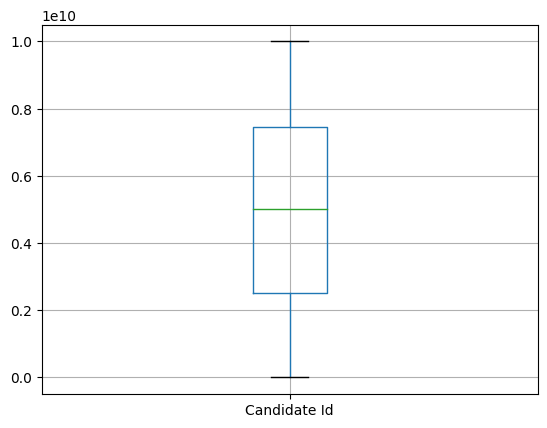

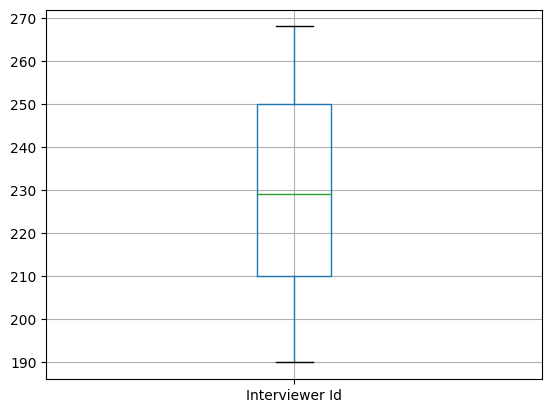

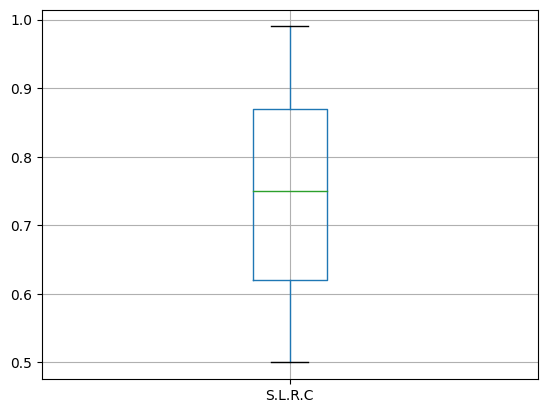

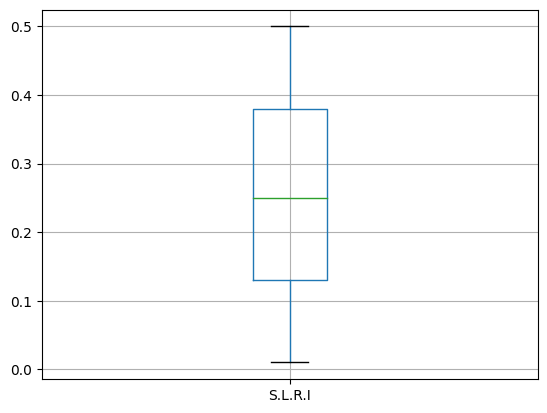

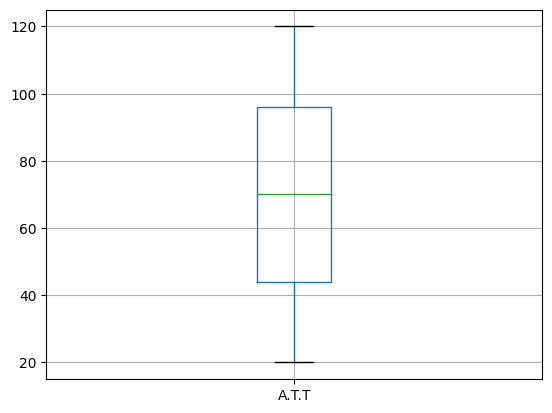

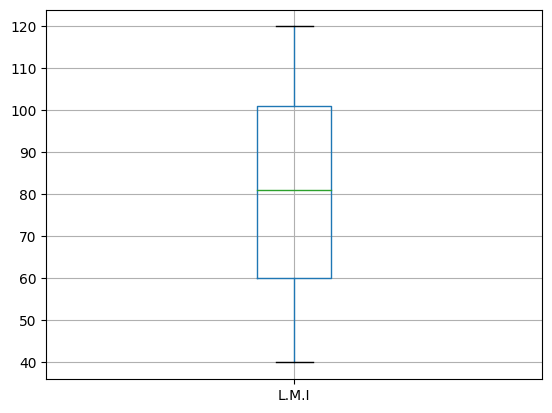

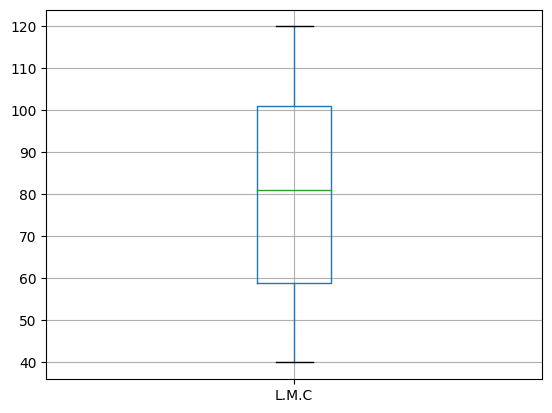

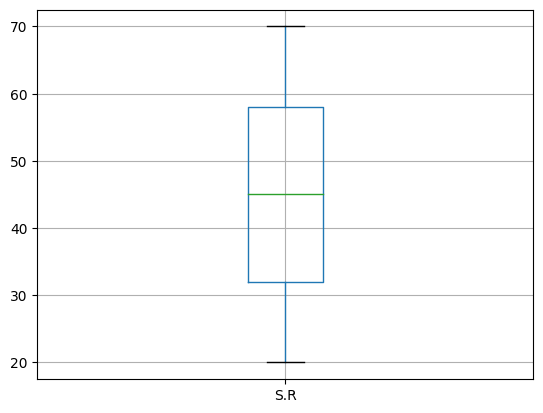

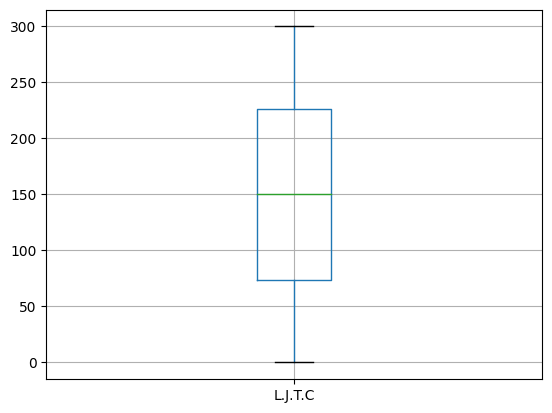

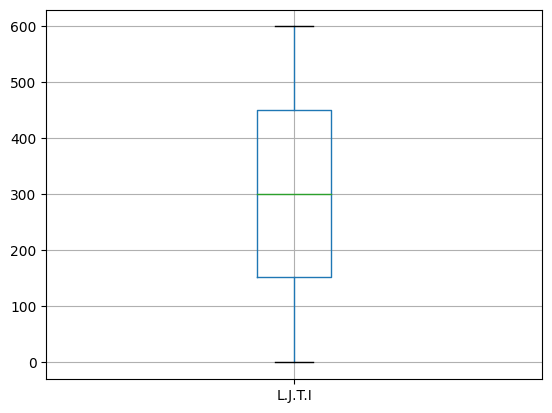

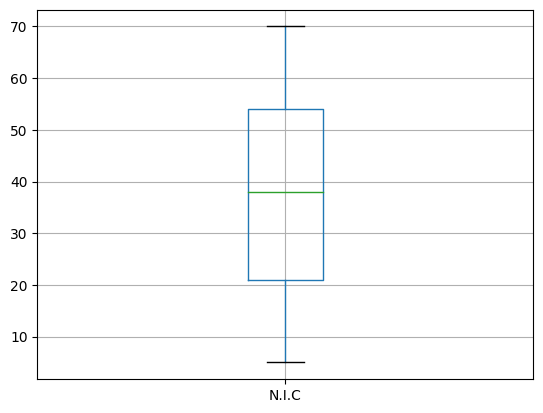

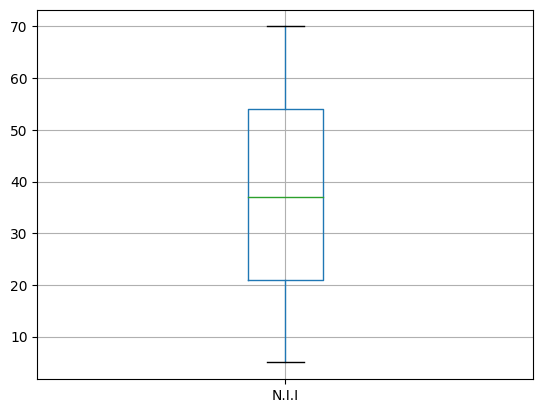

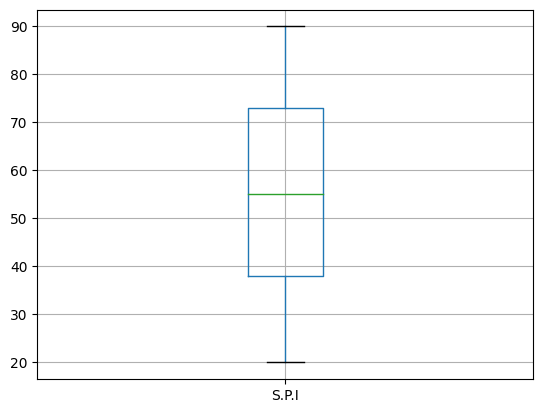

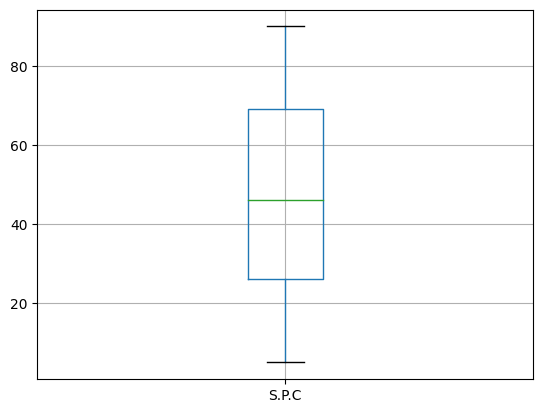

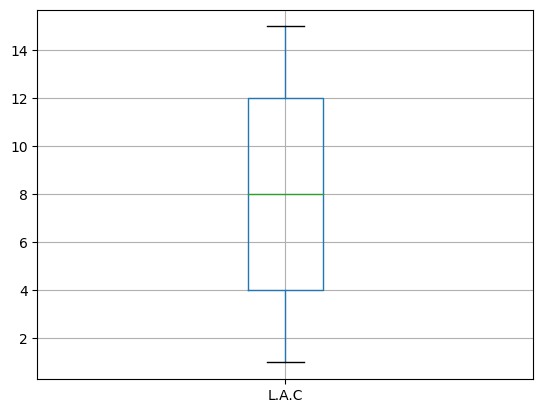

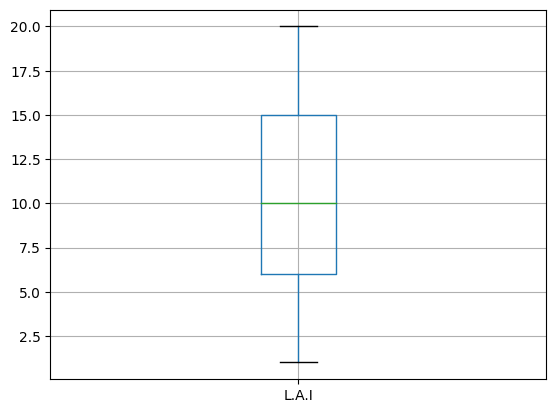

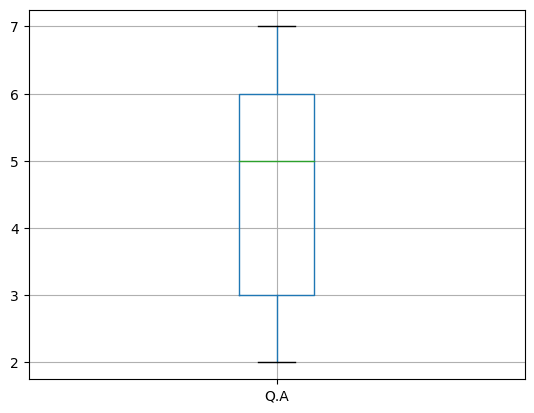

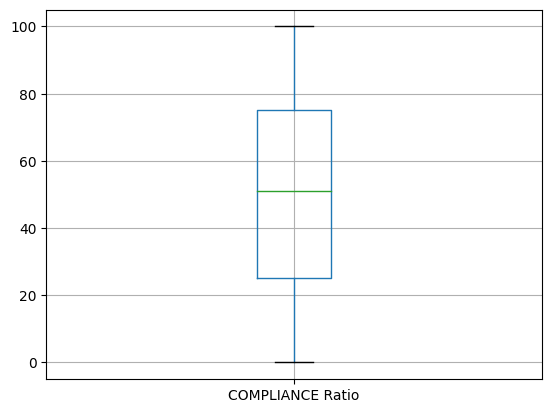

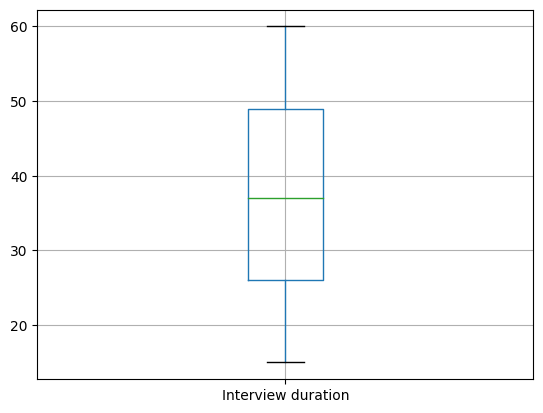

In [16]:
import matplotlib.pyplot as plt

colname=[]
for x in stud.columns[:-1]:
    if stud[x].dtype=="int64" or stud[x].dtype=="float64":
        colname.append(x)

for x in colname:
    stud.boxplot(column=x)
    plt.show()
# so actually there are no outliers in the Data.

<h3>Histogram</h3> ----> Check Data Distribution

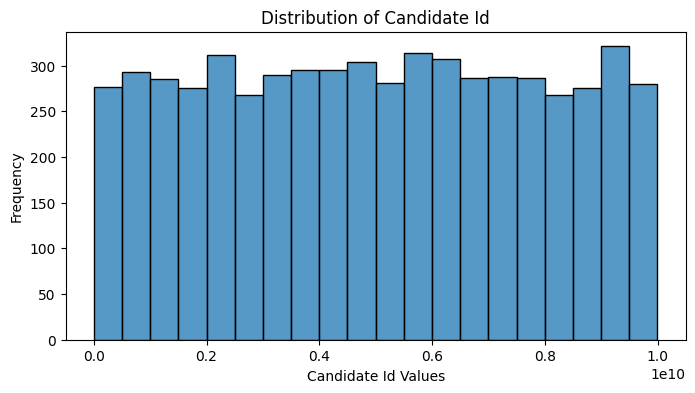

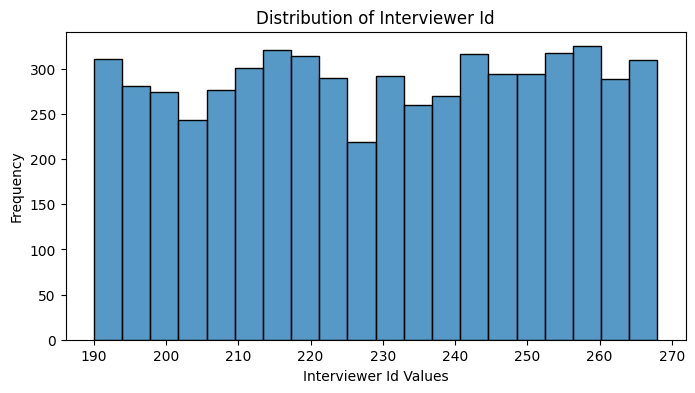

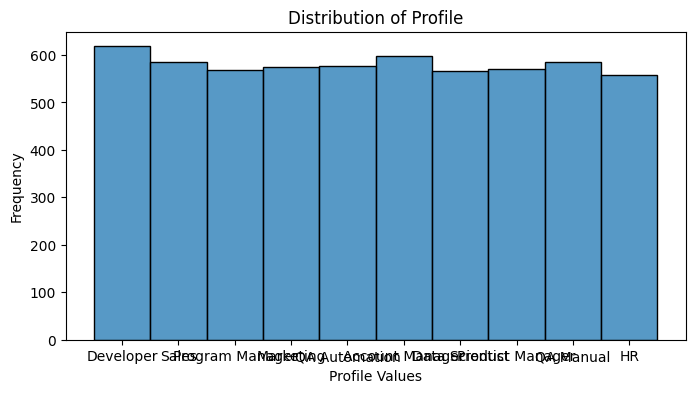

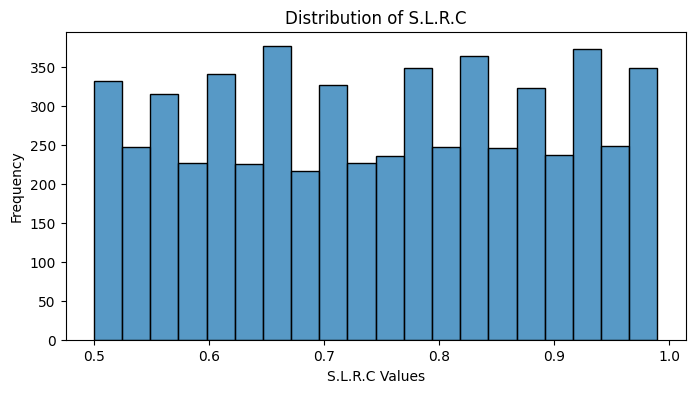

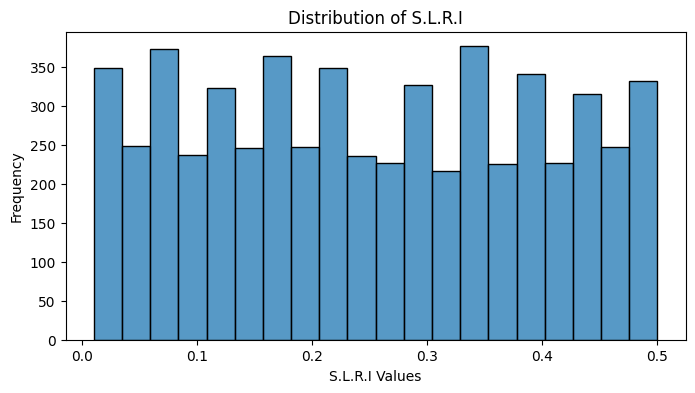

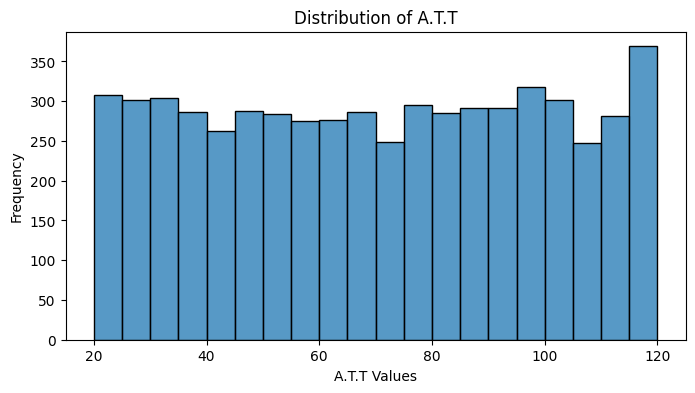

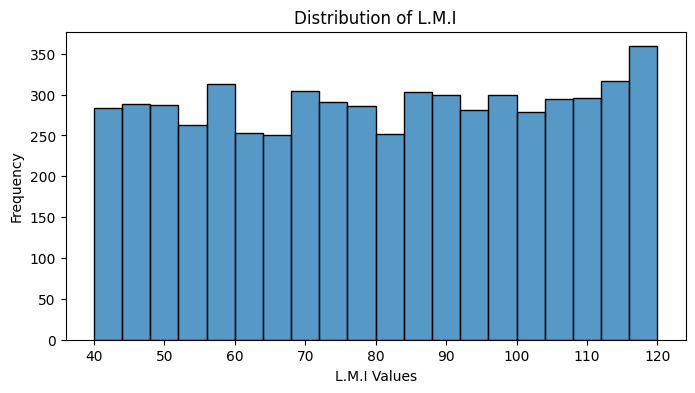

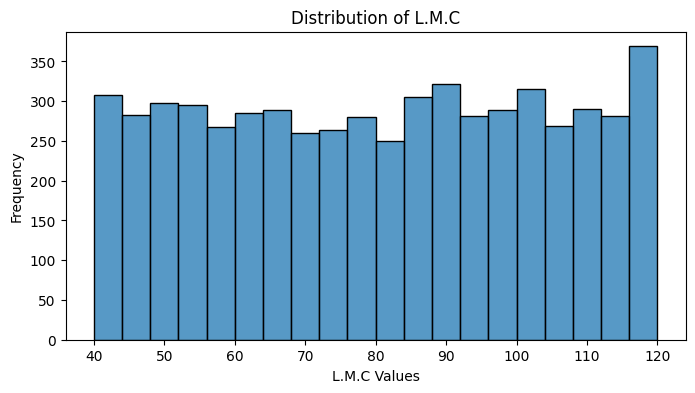

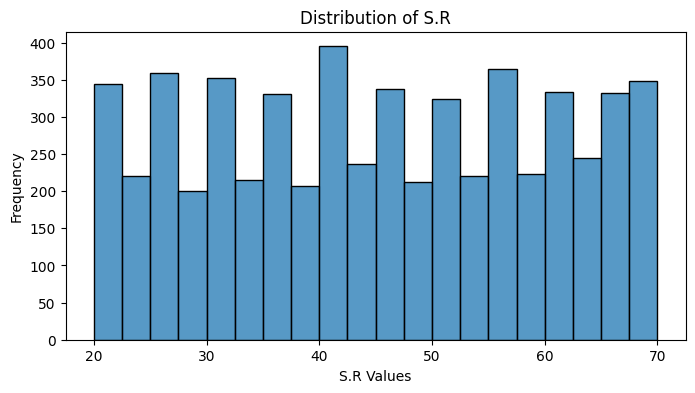

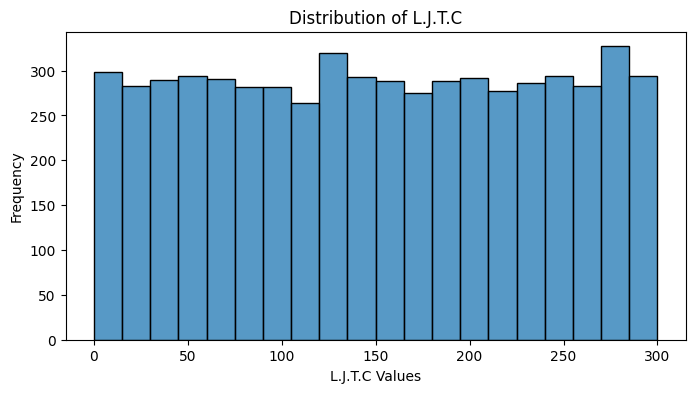

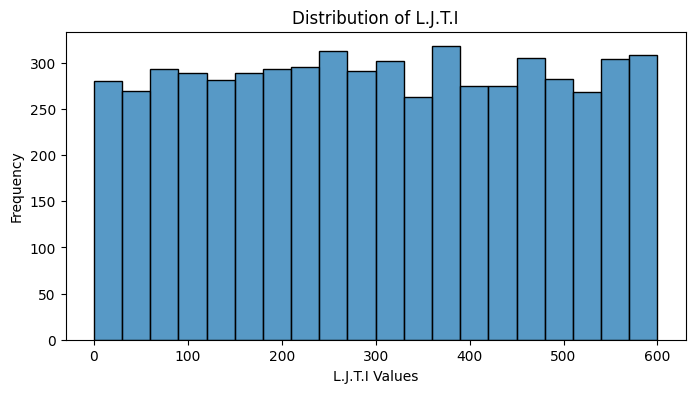

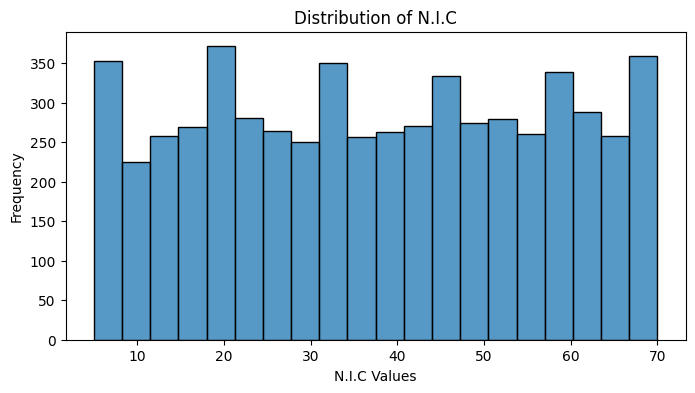

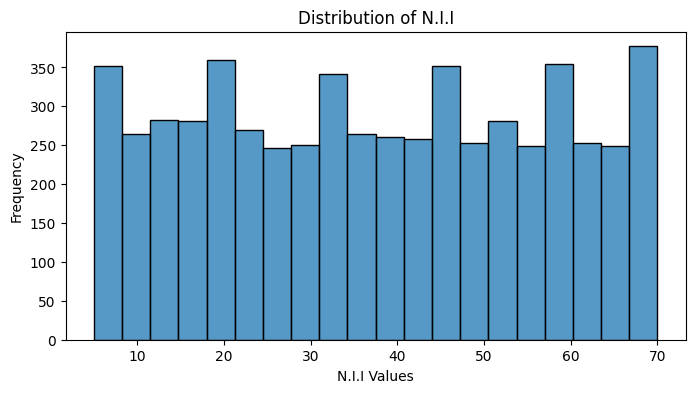

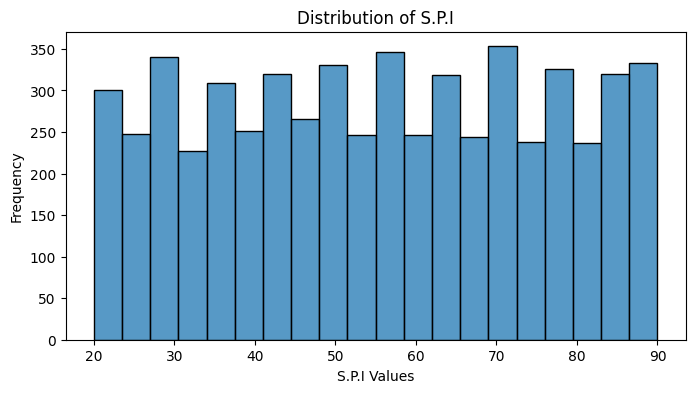

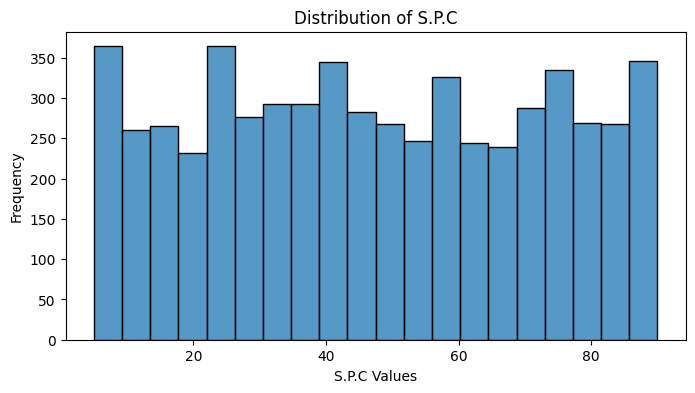

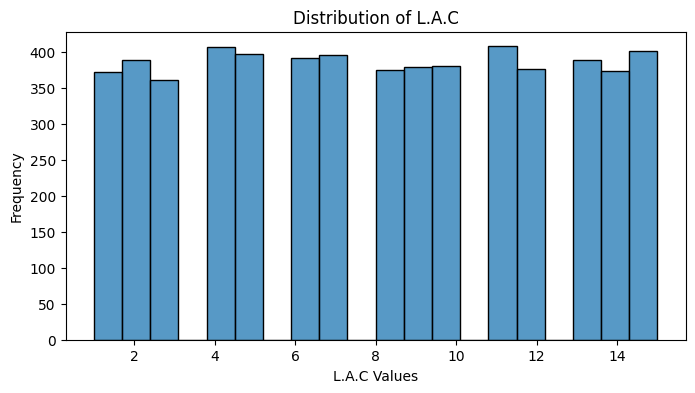

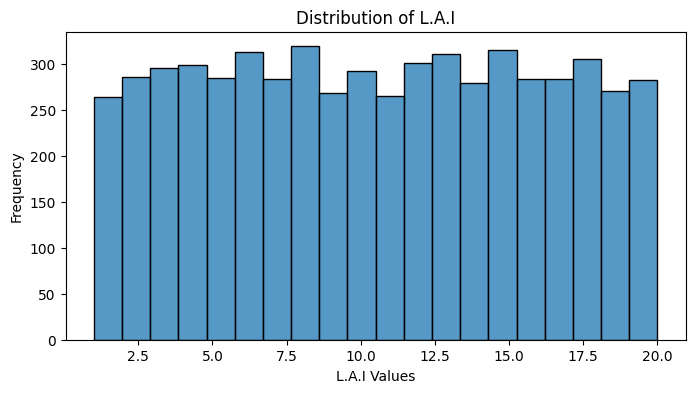

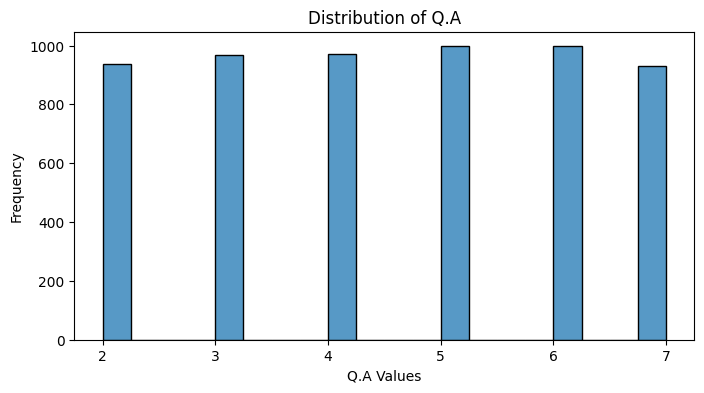

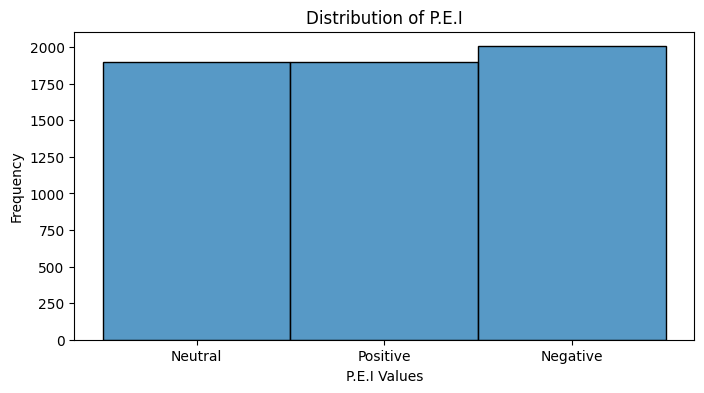

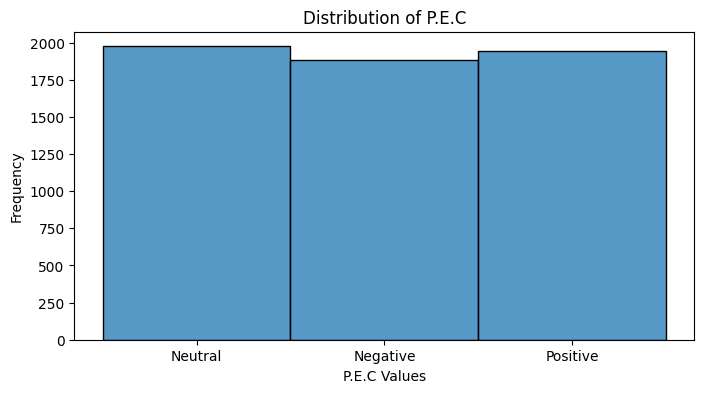

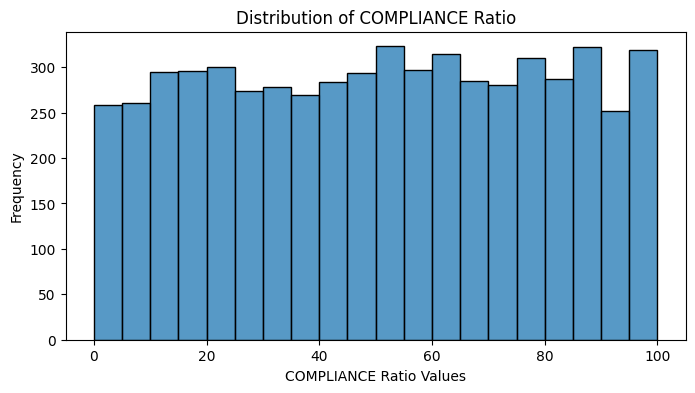

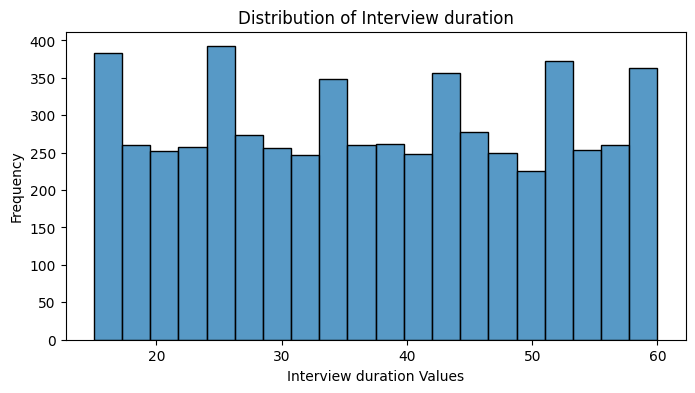

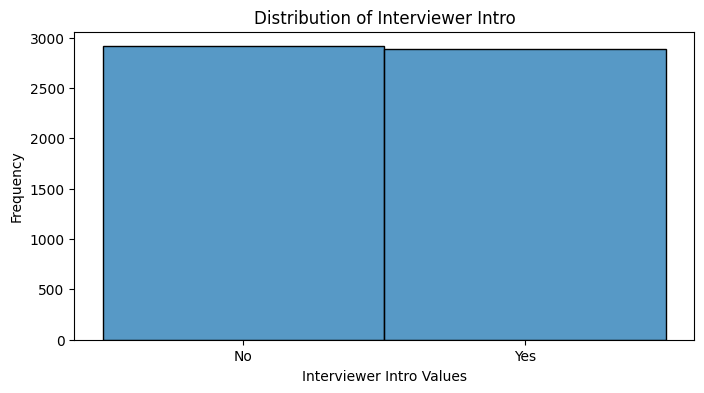

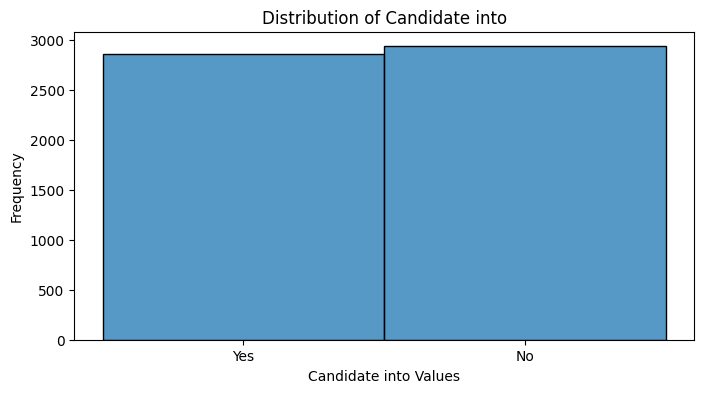

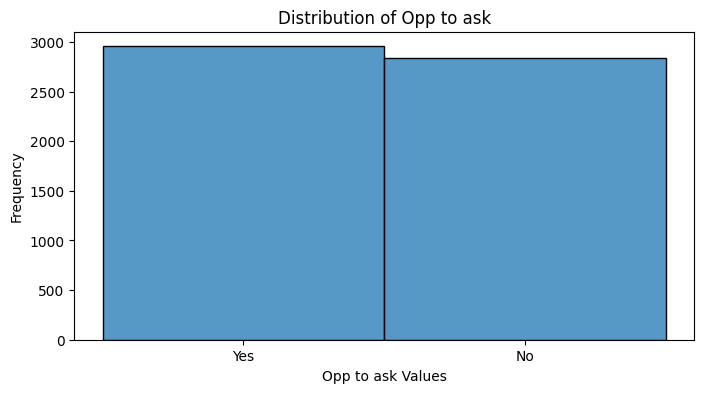

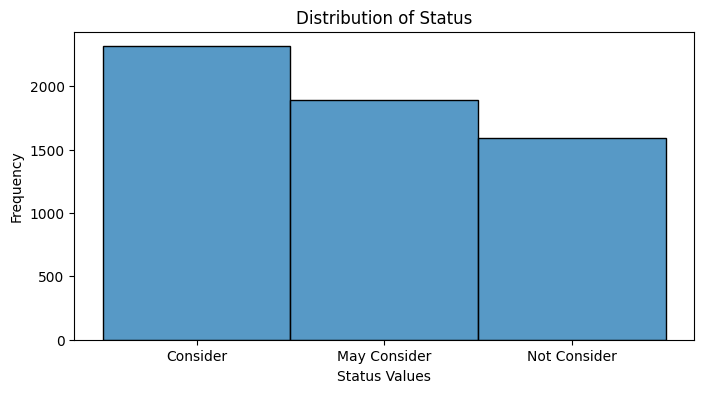

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'stud' is your Pandas DataFrame containing your data
# Replace 'stud' with your actual DataFrame

# Get the list of column names
columns = stud.columns

# Set the number of bins for the histograms
num_bins = 20  # You can adjust this as needed

# Loop through each column and create a histogram
for column in columns:
    plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
    sns.histplot(data=stud, x=column, bins=num_bins)
    plt.title(f'Distribution of {column}')
    plt.xlabel(f'{column} Values')
    plt.ylabel('Frequency')
    plt.show()

<h3>LabelEncoder()</h3> ----> Convert Categorical Data to Numerical

In [18]:
col=[]
for x in stud.columns:
  if stud[x].dtypes == "object":
    col.append(x)
col

['Profile',
 'P.E.I',
 'P.E.C',
 'Interviewer Intro',
 'Candidate into',
 'Opp to ask',
 'Status']

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in col:
    stud[x]=le.fit_transform(stud[x])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)

Feature Profile
mapping {'Account Manager': 0, 'Data Scientist': 1, 'Developer': 2, 'HR': 3, 'Marketing': 4, 'Product Manager': 5, 'Program Manager': 6, 'QA Automation': 7, 'QA Manual': 8, 'Sales': 9}
Feature P.E.I
mapping {'Negative': 0, 'Neutral': 1, 'Positive': 2}
Feature P.E.C
mapping {'Negative': 0, 'Neutral': 1, 'Positive': 2}
Feature Interviewer Intro
mapping {'No': 0, 'Yes': 1}
Feature Candidate into
mapping {'No': 0, 'Yes': 1}
Feature Opp to ask
mapping {'No': 0, 'Yes': 1}
Feature Status
mapping {'Consider': 0, 'May Consider': 1, 'Not Consider': 2}


<h3>Heatmap</h3> ----> Check the Correlation between the variables.

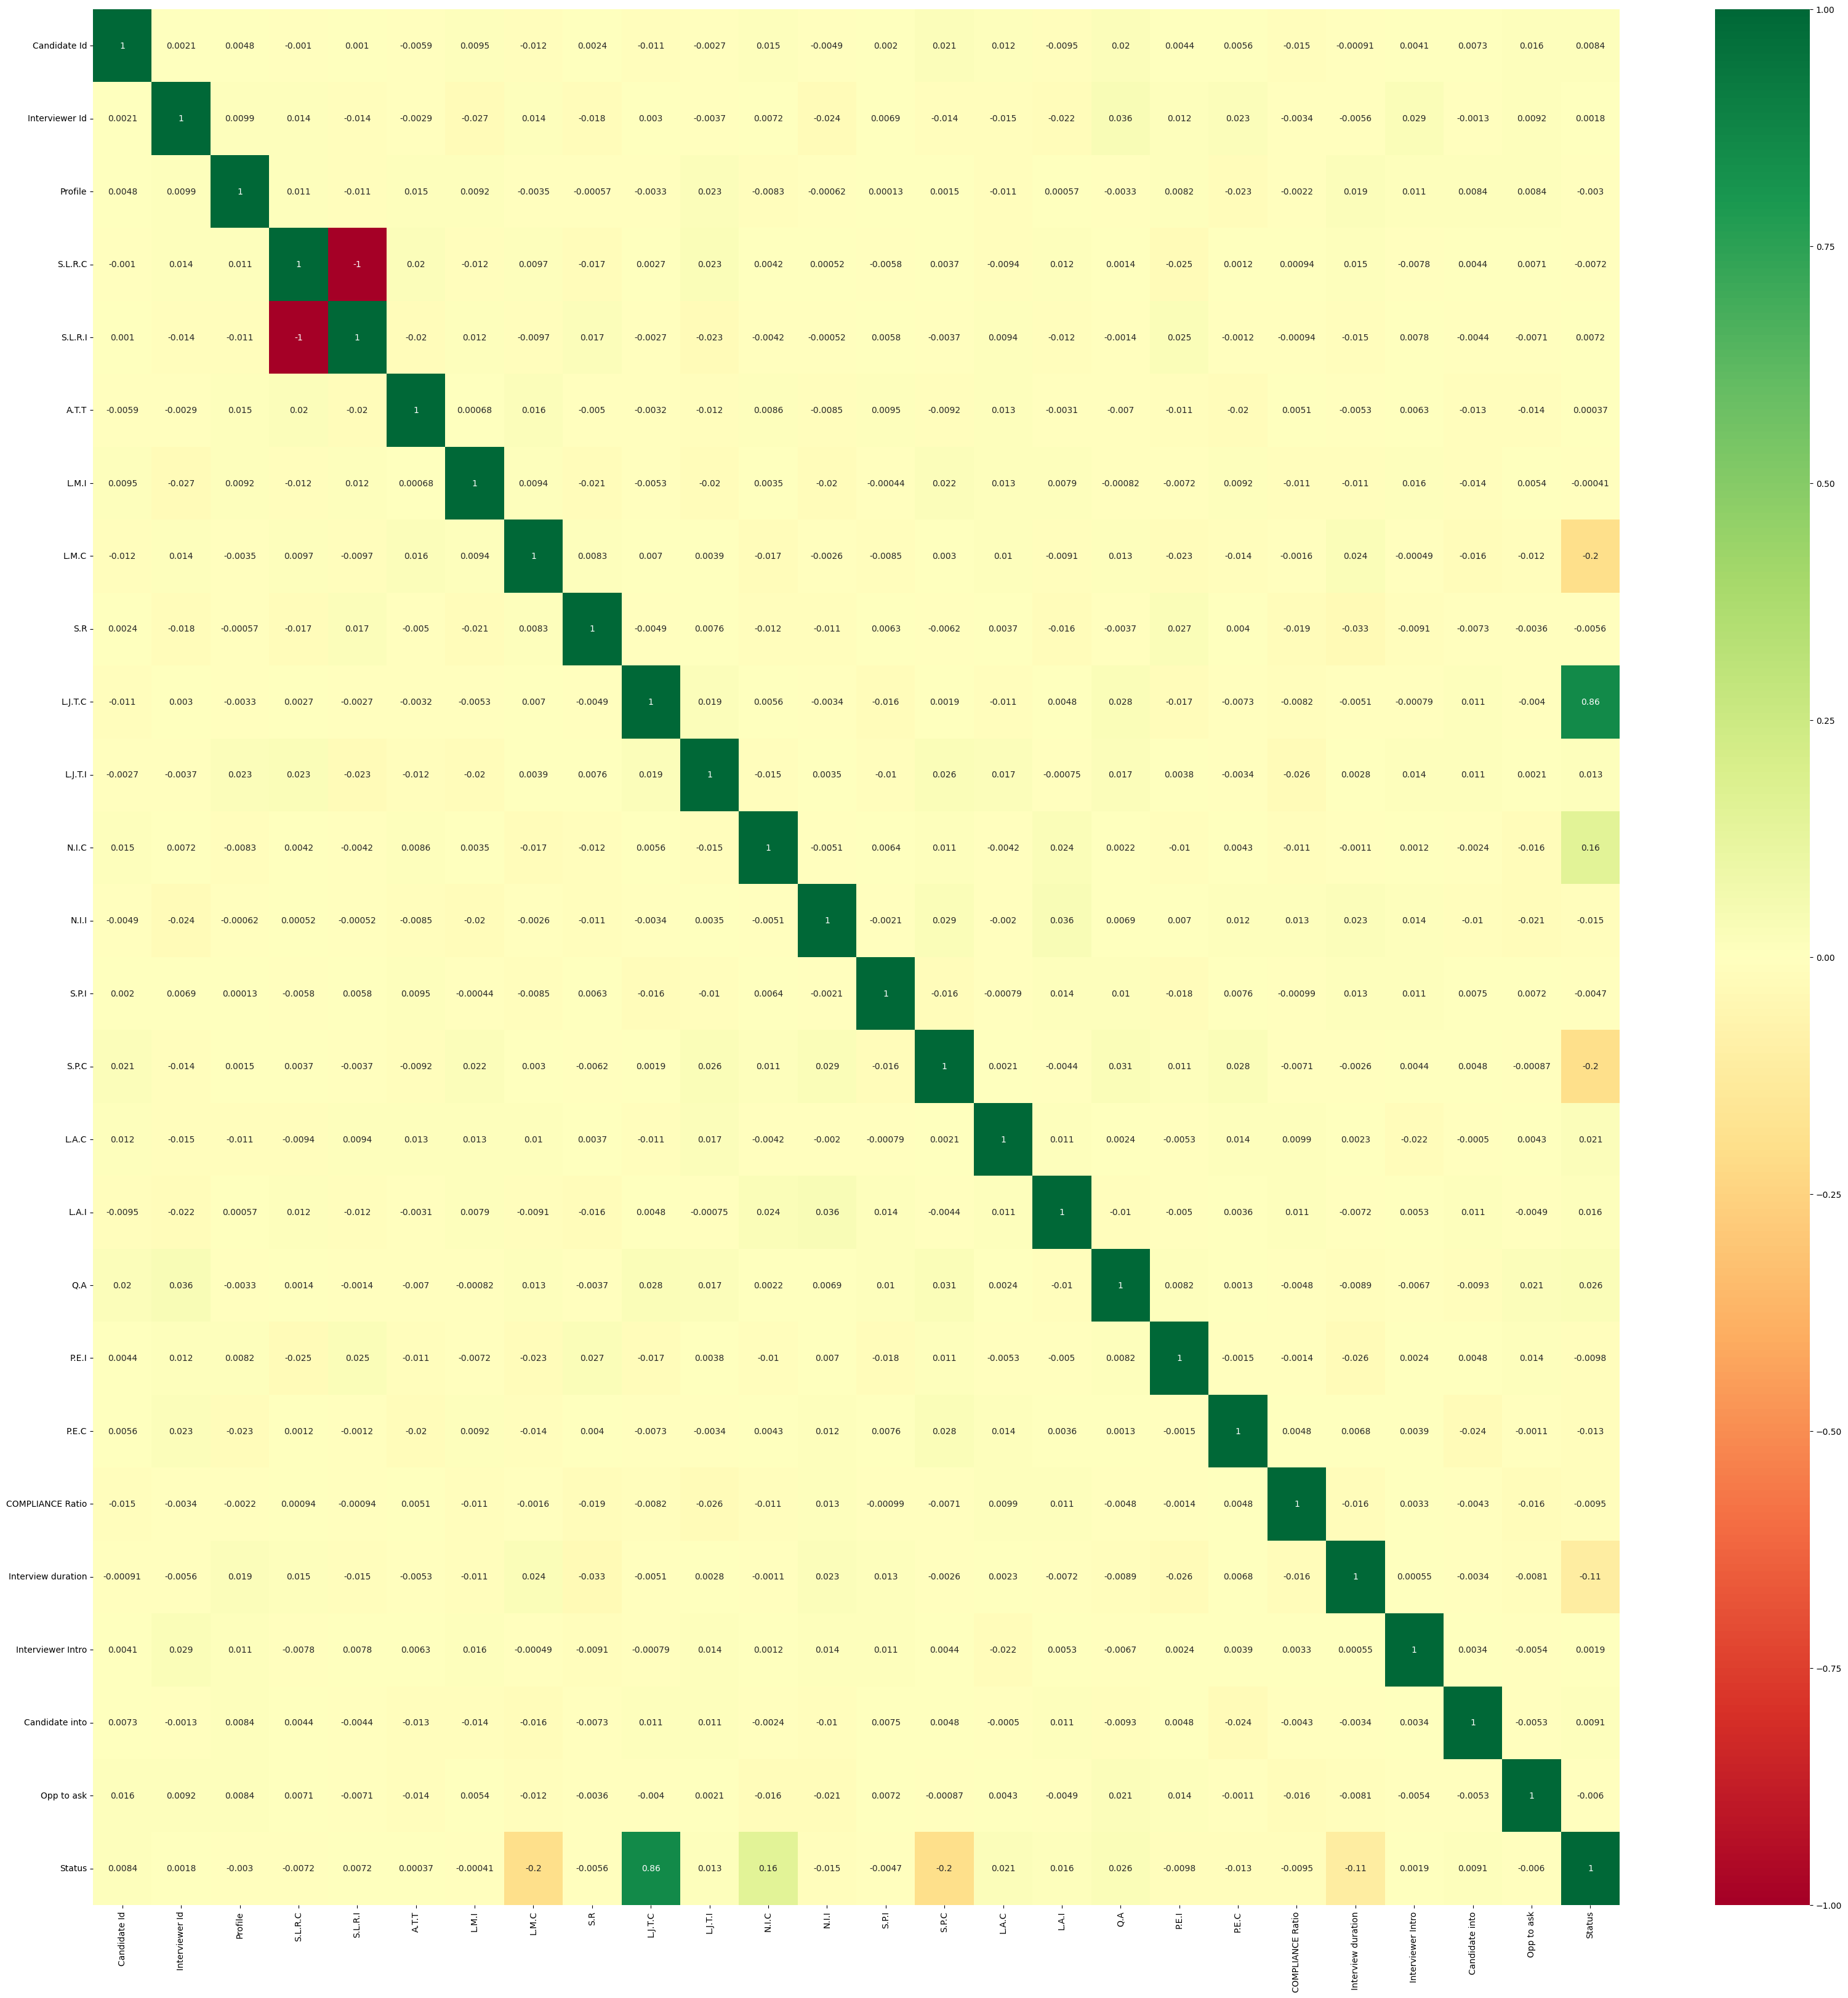

In [20]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = stud.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(40,40))
#plot heat map
g=sns.heatmap(stud[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [21]:
corr = stud.corr()

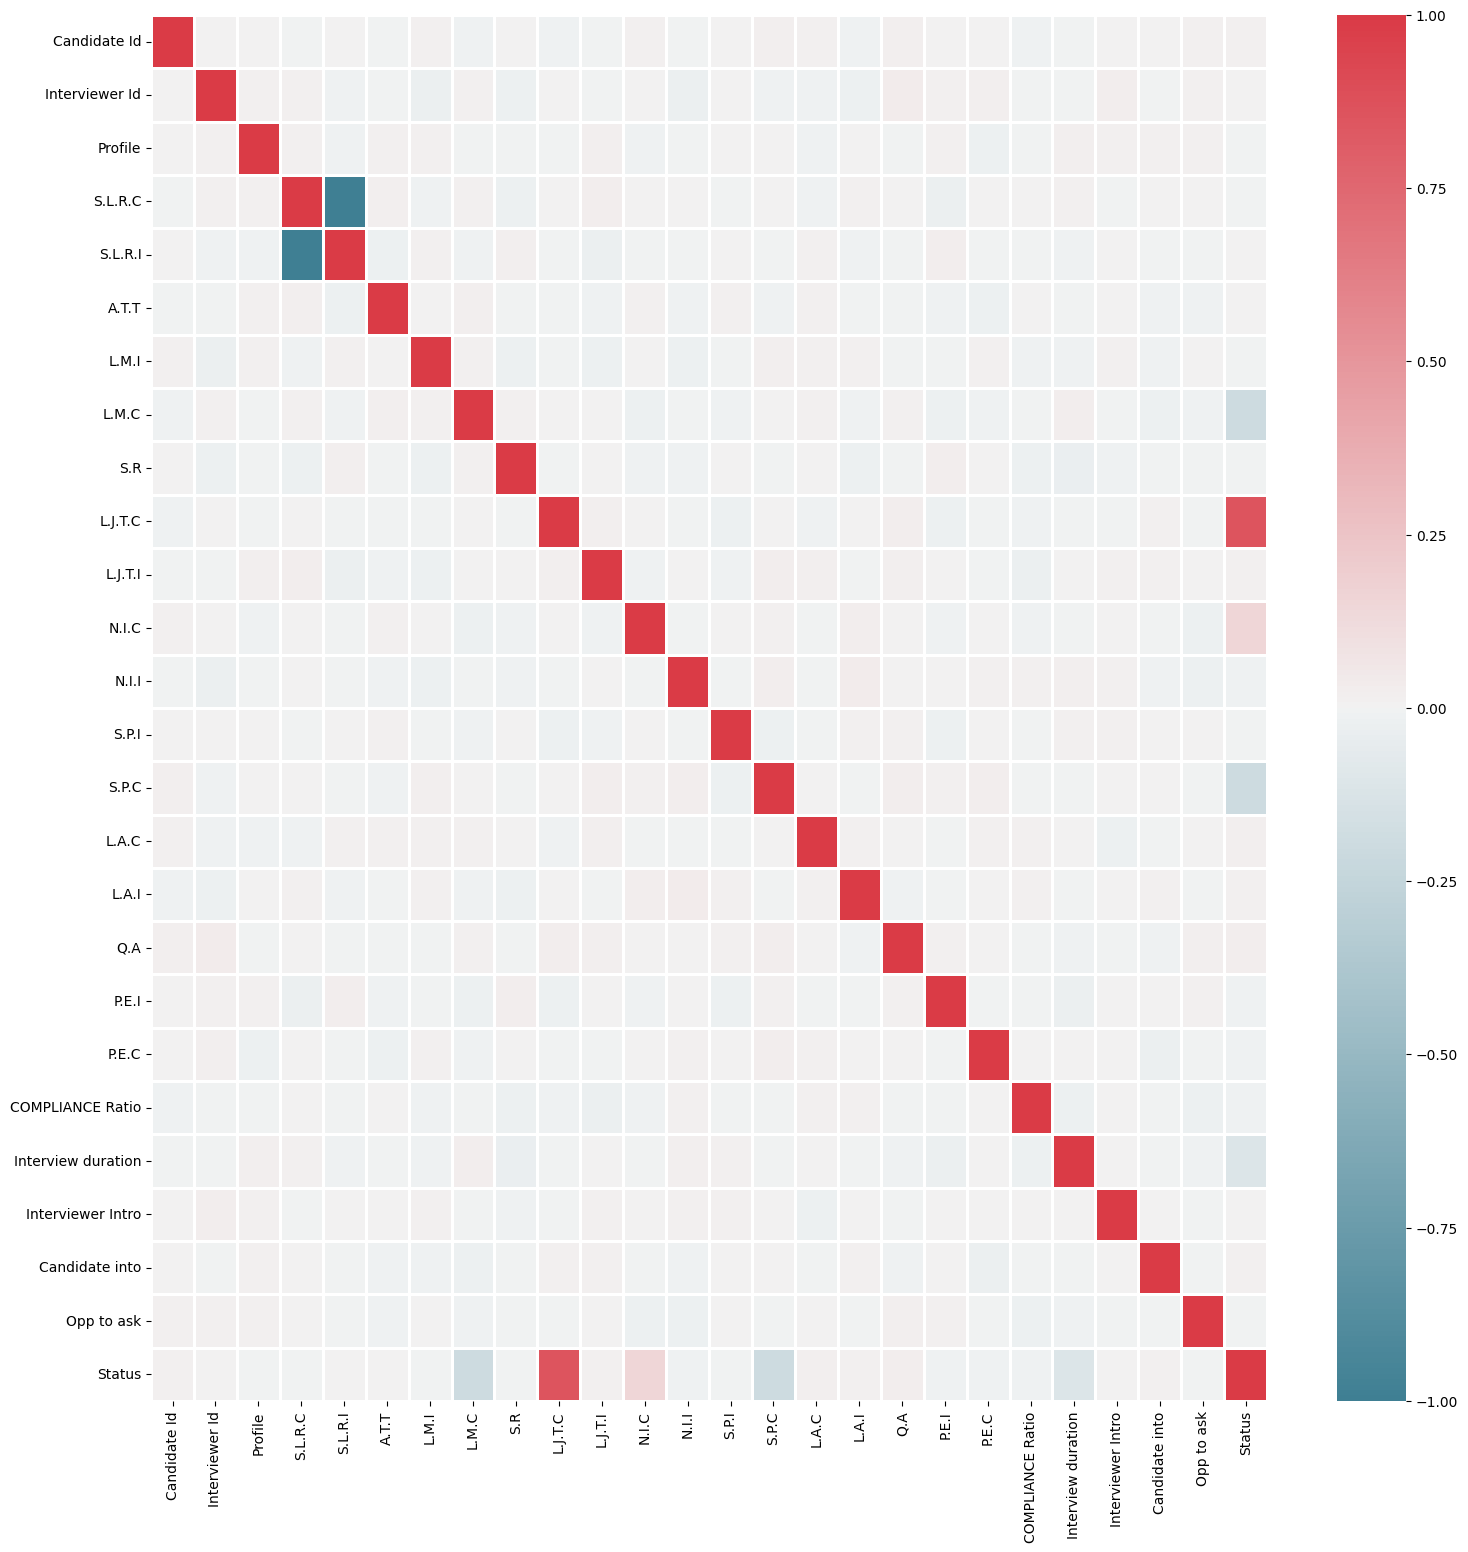

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'stud' is your DataFrame and you've already calculated the correlation matrix
# Calculate the correlation matrix
corr_matrix = stud.corr()

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr , cmap=cmap, center=0.0, vmax=1, linewidths=1, ax=ax)
plt.show()


In [23]:
stud.columns

Index(['Candidate Id', 'Interviewer Id', 'Profile', 'S.L.R.C', 'S.L.R.I',
       'A.T.T', 'L.M.I', 'L.M.C', 'S.R', 'L.J.T.C', 'L.J.T.I', 'N.I.C',
       'N.I.I', 'S.P.I', 'S.P.C', 'L.A.C', 'L.A.I', 'Q.A', 'P.E.I', 'P.E.C',
       'COMPLIANCE Ratio', 'Interview duration', 'Interviewer Intro',
       'Candidate into', 'Opp to ask', 'Status'],
      dtype='object')

<h3>Feature Selection</h3>

So as Per the Dataset you need to do the Feature Selection So i have remove some Unwanted columns that i dont need in this data to get the Best Accuracy.

In [24]:
stud.drop(columns=['Candidate Id', 'Interviewer Id', 'Profile', 'S.L.R.C', 'S.L.R.I',
                   'A.T.T', 'L.M.I', 'S.R', 'L.J.T.I',
                   'N.I.I', 'S.P.I', 'P.E.I', 'P.E.C','Q.A','L.A.I',
                   'COMPLIANCE Ratio', 'Interviewer Intro',
                   'Candidate into', 'Opp to ask'], inplace=True)
#I've applied domain knowledge to make an informed decision to eliminate 19 columns from the dataset.
stud.columns

Index(['L.M.C', 'L.J.T.C', 'N.I.C', 'S.P.C', 'L.A.C', 'Interview duration',
       'Status'],
      dtype='object')

In [25]:
stud.columns
# Now, we're left with only 7 columns, and one of them is our target variable

Index(['L.M.C', 'L.J.T.C', 'N.I.C', 'S.P.C', 'L.A.C', 'Interview duration',
       'Status'],
      dtype='object')

<h3>Spliting the Data</h3> ----> Into train and test(validation) : train_test_split()

In [26]:
stud.columns

Index(['L.M.C', 'L.J.T.C', 'N.I.C', 'S.P.C', 'L.A.C', 'Interview duration',
       'Status'],
      dtype='object')

In [27]:
import pandas as pd

X = stud.iloc[:, :-1]  # Features (all independent columns)
Y = stud.iloc[:, -1]   # Target variable (Status

print(X.columns)

Index(['L.M.C', 'L.J.T.C', 'N.I.C', 'S.P.C', 'L.A.C', 'Interview duration'], dtype='object')


In [28]:
print("X shape :",X.shape,"\nY shape :",Y.shape)

X shape : (5800, 6) 
Y shape : (5800,)


<h3>Scalling the Data</h3> ----> Using StandardScaler

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
#transform the independent variables
X = scaler.transform(X)

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.20, random_state = 45)

In [31]:
print("x_train :",x_train.shape,"\nx_test  :",x_test.shape,"\ny_train :",y_train.shape,"\ny_test  :",y_test.shape)

x_train : (4640, 6) 
x_test  : (1160, 6) 
y_train : (4640,) 
y_test  : (1160,)


In [32]:
# x_train

In [33]:
# x_test

<h1>Building the Model</h1> ---->
 So there are many algorithm, but for this data we have apllied just 2 Algorithm on this dataset to get the best accuracy.

<h2>Logistic Regression - 1</h2>

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#create a model object
classifier = LogisticRegression(C = 100, max_iter=1000, random_state = 45)
classifier.fit(x_train,y_train)
Y_pred = classifier.predict(x_test)

print("x_train, y_train : ",classifier.score(x_train,y_train))
print("accuracy score   : ",accuracy_score(y_test, Y_pred))

x_train, y_train :  0.9982758620689656
accuracy score   :  0.996551724137931


In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm = confusion_matrix(y_test, Y_pred)
print("Confusion Matrix for Logistic:")
print(cfm)

classification_rep = classification_report(y_test, Y_pred)
print("Classification Report for Logistic:")
print(classification_rep)

accuracy_score = accuracy_score(y_test, Y_pred)
print("Accuracy of the Logistic model:", accuracy_score)

Confusion Matrix for Logistic:
[[460   1   1]
 [  1 384   1]
 [  0   0 312]]
Classification Report for Logistic:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       462
           1       1.00      0.99      1.00       386
           2       0.99      1.00      1.00       312

    accuracy                           1.00      1160
   macro avg       1.00      1.00      1.00      1160
weighted avg       1.00      1.00      1.00      1160

Accuracy of the Logistic model: 0.996551724137931


<h2>Support Vector Classification - 2</h2>

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc = SVC(C = 250,
          gamma = 0.001,
          random_state = 45)
svc.fit(x_train, y_train)
Y_pred = svc.predict(x_test)

print("x_train,y_train",svc.score(x_train,y_train))
print("accuracy score",accuracy_score(y_test, Y_pred))

x_train,y_train 0.9961206896551724
accuracy score 0.9887931034482759


In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm = confusion_matrix(y_test, Y_pred)
print("Confusion Matrix for SVC:")
print(cfm)

classification_rep = classification_report(y_test, Y_pred)
print("Classification Report for SVC:")
print(classification_rep)

accuracy_score = accuracy_score(y_test, Y_pred)
print("Accuracy of the SVC model:", accuracy_score)

Confusion Matrix for SVC:
[[457   4   1]
 [  2 383   1]
 [  0   5 307]]
Classification Report for SVC:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       462
           1       0.98      0.99      0.98       386
           2       0.99      0.98      0.99       312

    accuracy                           0.99      1160
   macro avg       0.99      0.99      0.99      1160
weighted avg       0.99      0.99      0.99      1160

Accuracy of the SVC model: 0.9887931034482759


<h4><b>Conclusion :</b></h4>After analyzing the training data, I removed several columns based on what I know about the subject and insights from heatmap patterns. I tried using two different methods to predict the 'Status' variable. It turned out that logistic regression worked better than SVC in making predictions. Now, I'll use the same approach on the test data to see if it predicts 'Status' more accurately. This will help determine which method is best for predicting our target variable

<h2> Test Dataset </h3>

We will use the same steps on the test data as we did on the training data, including the best model we've seen before, to achieve the highest accuracy.

In [38]:
test = pd.read_csv(r'/content/drive/MyDrive/Machine Learning/Hackathon Projects/Interview pred/Data Set/test_IA_-_test (1).csv', header = 0, index_col=0 )

In [39]:
test.head()

,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,...,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status
Interview Id,,,,,,,,,,,,,,,,,,,,,
7.021280e+11,2.381365e+09,229,Product Manager,0.52,0.48,103,53,77,30,26.0,...,19.0,4.0,Positive,Negative,24.0,49,Yes,Yes,Yes,Consider
6.134910e+11,8.428514e+08,194,Product Manager,0.87,0.13,54,57,57,68,179.0,...,9.0,7.0,Positive,Neutral,99.0,24,No,Yes,Yes,May Consider
7.599990e+11,7.681665e+09,266,QA Automation,0.60,0.40,50,117,93,36,137.0,...,15.0,3.0,Negative,Positive,16.0,16,Yes,No,Yes,May Consider
3.917600e+11,6.627808e+09,256,HR,0.52,0.48,102,114,66,31,176.0,...,4.0,6.0,Negative,Neutral,66.0,40,No,No,Yes,Not Consider
9.415990e+11,1.148634e+09,267,HR,0.59,0.41,96,73,115,23,218.0,...,4.0,6.0,Positive,Positive,47.0,38,No,Yes,Yes,Not Consider


In [40]:
test.columns

Index(['Candidate Id', 'Interviewer Id', 'Profile', 'S.L.R.C', 'S.L.R.I',
       'A.T.T', 'L.M.I', 'L.M.C', 'S.R', 'L.J.T.C', 'L.J.T.I', 'N.I.C',
       'N.I.I', 'S.P.I', 'S.P.C', 'L.A.C', 'L.A.I', 'Q.A', 'P.E.I', 'P.E.C',
       'COMPLIANCE Ratio', 'Interview duration', 'Interviewer Intro',
       'Candidate into', 'Opp to ask', 'Status'],
      dtype='object')

In [41]:
test.shape

(1200, 26)

In [42]:
test.isnull().sum()

Candidate Id          0
Interviewer Id        0
Profile               0
S.L.R.C               0
S.L.R.I               1
A.T.T                 0
L.M.I                 0
L.M.C                 0
S.R                   0
L.J.T.C               1
L.J.T.I               0
N.I.C                 0
N.I.I                 0
S.P.I                 2
S.P.C                 0
L.A.C                 0
L.A.I                 1
Q.A                   1
P.E.I                 2
P.E.C                 2
COMPLIANCE Ratio      1
Interview duration    0
Interviewer Intro     2
Candidate into        0
Opp to ask            0
Status                0
dtype: int64

<h3>Missing Data Imputation</h3>

In [43]:
for x in test.columns:
    if test[x].dtype=="object" or test[x].dtype=="bool":
        test[x].fillna(test[x].mode()[0], inplace=True)
    elif test[x].dtype=="int64" or test[x].dtype=="float64":
        test[x].fillna(round(test[x].mean()), inplace=True)
test.isnull().sum()

Candidate Id          0
Interviewer Id        0
Profile               0
S.L.R.C               0
S.L.R.I               0
A.T.T                 0
L.M.I                 0
L.M.C                 0
S.R                   0
L.J.T.C               0
L.J.T.I               0
N.I.C                 0
N.I.I                 0
S.P.I                 0
S.P.C                 0
L.A.C                 0
L.A.I                 0
Q.A                   0
P.E.I                 0
P.E.C                 0
COMPLIANCE Ratio      0
Interview duration    0
Interviewer Intro     0
Candidate into        0
Opp to ask            0
Status                0
dtype: int64

In [44]:
test.drop(columns=['Candidate Id', 'Interviewer Id', 'Profile', 'S.L.R.C', 'S.L.R.I',
       'A.T.T', 'L.M.I', 'S.R', 'L.J.T.I',
       'N.I.I', 'S.P.I', 'P.E.I', 'P.E.C','Q.A','L.A.I',
       'COMPLIANCE Ratio', 'Interviewer Intro',
       'Candidate into', 'Opp to ask'], inplace=True)
#Based on some domain knowledge to make an informed decision to eliminate 19 columns from the dataset.
test.columns

Index(['L.M.C', 'L.J.T.C', 'N.I.C', 'S.P.C', 'L.A.C', 'Interview duration',
       'Status'],
      dtype='object')

<h3>LabelEncoder() </h3> ----> Convert Categorical Data to Numerical

In [45]:
col=[]
for x in test.columns:
  if test[x].dtypes == "object":
    col.append(x)
col

['Status']

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in col:
    test[x]=le.fit_transform(test[x])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)

Feature Status
mapping {'Consider': 0, 'May Consider': 1, 'Not Consider': 2}


In [47]:
X = test.iloc[:,:-1]
Y = test.iloc[:,-1]

print(X.columns)

Index(['L.M.C', 'L.J.T.C', 'N.I.C', 'S.P.C', 'L.A.C', 'Interview duration'], dtype='object')


In [48]:
print("X shape :",X.shape,"\nY shape :",Y.shape)

X shape : (1200, 6) 
Y shape : (1200,)


<h3> Standardize test data</h3>

In [49]:
X = scaler.transform(X)

<h2> Logistic Regression Model - 1 </h2>

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#create a model object
classifier = LogisticRegression(C = 100,  max_iter=1000, random_state = 45)
#train the model object
classifier.fit(x_train,y_train)

Y_pred = classifier.predict(X)

print("x_train,y_train = ",classifier.score(x_train,y_train))
print("accuracy score",accuracy_score(Y, Y_pred))

x_train,y_train =  0.9982758620689656
accuracy score 0.7091666666666666


In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm = confusion_matrix(Y, Y_pred)
print("Confusion Matrix for Logistic:")
print(cfm)

classification_rep = classification_report(Y, Y_pred)
print("Classification Report for Logistic:")
print(classification_rep)

accuracy_score = accuracy_score(Y, Y_pred)
print("Accuracy of the Logistic model:", accuracy_score)

Confusion Matrix for Logistic:
[[359  55  55]
 [ 53 288  50]
 [ 75  61 204]]
Classification Report for Logistic:
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       469
           1       0.71      0.74      0.72       391
           2       0.66      0.60      0.63       340

    accuracy                           0.71      1200
   macro avg       0.70      0.70      0.70      1200
weighted avg       0.71      0.71      0.71      1200

Accuracy of the Logistic model: 0.7091666666666666


<h2> SVM Model - 2 </h2>

In [52]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC(C = 250,
          gamma = 0.001,
          kernel = "rbf",
          random_state = 45)
svc.fit(x_train, y_train)

Y_pred = svc.predict(X)

print("x_train,y_train = ",svc.score(x_train,y_train))
print("accuracy score",accuracy_score(Y, Y_pred))

x_train,y_train =  0.9961206896551724
accuracy score 0.705


In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm = confusion_matrix(Y, Y_pred)
print("Confusion Matrix for Logistic:")
print(cfm)

classification_rep = classification_report(Y, Y_pred)
print("Classification Report for Logistic:")
print(classification_rep)

accuracy_score = accuracy_score(Y, Y_pred)
print("Accuracy of the Logistic model:", accuracy_score)

Confusion Matrix for Logistic:
[[356  58  55]
 [ 53 287  51]
 [ 75  62 203]]
Classification Report for Logistic:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       469
           1       0.71      0.73      0.72       391
           2       0.66      0.60      0.63       340

    accuracy                           0.70      1200
   macro avg       0.70      0.70      0.70      1200
weighted avg       0.70      0.70      0.70      1200

Accuracy of the Logistic model: 0.705


<h1> Conclusion <h1>
We got really good at predicting 'Status'. By smartly removing many of the columns and fixing missing info cleverly, we reached an awesome 70.91% accuracy using Logistic Regression on the test data. Among different methods we tried, Logistic Regression was the best. Even though our way works great, trying more methods and different algorithms might help us do even better. There could be an even better way to predict student interview Status.








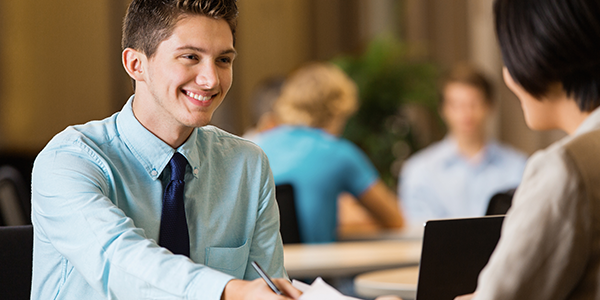